<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_helium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Helium atom (He)**

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [2]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    He 0.00 0.00 0.00
'''

# Name
molecule = 'Helium (He)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0          # H₂ gas is stable, closed-shell diatomic molecule. The two electrons (one from each H atom) form a covalent bond with paired spins.
# wo electrons, paired in a bonding orbital. Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [4]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Helium (He) molecule symmetry:
 Top group: SO3
 Group name: SO3
--------------------


Point Group Symmetry
* **Shape:** Linear
* **Symmetry Operations:** Infinite rotation axis ($C_\infty$) along the bond, infinite number of vertical mirror planes ($\sigma_v$), a horizontal mirror plane ($\sigma_h$), and an inversion center ($i$).
* **Point Group:** **$D_{\infty h}$ (Dooh)**
* *Yes, this one is $D_{\infty h}$!*

In [5]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -2.85516047724274


np.float64(-2.85516047724274)

converged SCF energy = -2.85516047724274


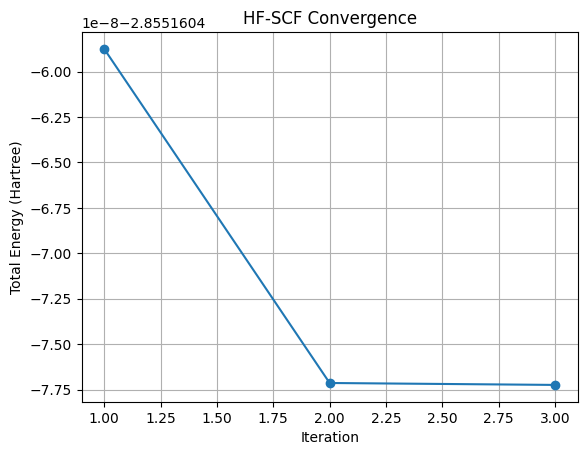

Ground state energy for Helium (He): -2.85516047724274 Hartree


In [6]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [8]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -2.90705409388747


np.float64(-2.9070540938874694)

In [9]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -2.85516047724274
E(MP2) = -2.88098881679413  E_corr = -0.025828339551385
E(SCS-MP2) = -2.8861544847044  E_corr = -0.030994007461662
MP2 energy: -0.025828339551384975 Hartree


In [10]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -2.85516047724274
E(CCSD) = -2.887594835752642  E_corr = -0.03243435850990163
CCSD(T) correction = 0


In [11]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -2.85516047724274
Excited State energies (eV)
[51.94674047 77.37711192 77.37711192]

** Singlet excitation energies and oscillator strengths **
Excited State   1:  s+0     51.94674 eV     23.87 nm  f=0.0000
Excited State   2:  p+0     77.37711 eV     16.02 nm  f=0.8856
Excited State   3:  p-1     77.37711 eV     16.02 nm  f=0.8856
